In [2]:
import numpy as np
import pandas as pd

In [4]:
crop = pd.read_csv("Crop_recommendation.csv")
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
y = crop["label"]
y

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object

In [6]:
X = crop.drop(["label"], axis=1)
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [7]:
corr = X.corr()

import seaborn as sns
sns.heatmap(corr.round(3), annot=True, cbar=True, cmap='coolwarm', vmin=-1, vmax=1)

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
mask = np.triu(np.ones_like(corr, dtype=bool))
mask

array([[ True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True],
       [False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False,  True]])

<Axes: >

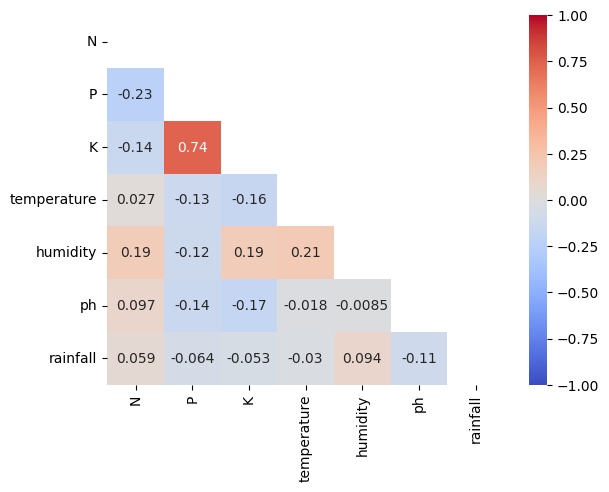

In [ ]:
sns.heatmap(corr, annot=True, vmax=1, vmin=-1, cmap='coolwarm', mask= mask)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# scale the features using minmaxscaler
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()

X_train = minmaxscaler.fit_transform(X_train)
X_test = minmaxscaler.transform(X_test)

In [ ]:
# standardization using standardscalar
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# training models

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    # print(f"{name}\n\n{classification_report(y_test, ypred)}")
    print(name)
    print(classification_report(y_test, ypred))
    print(confusion_matrix(y_test, ypred))

Logistic Regression
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.90      0.95      0.93        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.83      0.87      0.85        23
 kidneybeans       0.95      0.95      0.95        20
      lentil       0.85      1.00      0.92        11
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.92      0.96        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      p

In [ ]:
# ensemble learning

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

ensemble_models = {
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
}


for name, model in ensemble_models.items():
    model.fit(X_train,y_train)
    ypred = model.predict(X_test)
    print(f"{name}  with accuracy : {accuracy_score(y_test,ypred)}")

Random Forest  with accuracy : 0.9954545454545455
Bagging  with accuracy : 0.9863636363636363
AdaBoost  with accuracy : 0.1409090909090909
Gradient Boosting  with accuracy : 0.9818181818181818


In [ ]:
# the model used for predictions is random forest classifier

forest = RandomForestClassifier()
forest.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
# function that uses the random forest classifier and returns the predicted value
def recommendation(N,P,k,temperature,humidity,ph,rainfal):
    features = np.array([[N,P,k,temperature,humidity,ph,rainfal]])
    transformed_features = minmaxscaler.fit_transform(features)
    transformed_features = scaler.fit_transform(transformed_features)
    prediction = forest.predict(transformed_features).reshape(1,-1)

    return prediction[0]

In [ ]:
# input data
N = 90
P = 45
k = 45
temperature = 30.0
humidity = 70
ph = 7
rainfall = 200

# predicted crop
predict = recommendation(N,P,k,temperature,humidity,ph,rainfall)

recommended_crop = predict[0]
print("{} is a best crop to be cultivated ".format(recommended_crop))

papaya is a best crop to be cultivated 
